# <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#37FABC; font-size:160%; text-align:center;padding: 0px; border-bottom: 5px solid #407A68">Playground Series S3-E8 EDA and modeling</p>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 5px solid #008F77">Intro</p>

**🟦EN**: This Kaggle workbook aims to provide a comprehensive exploratory data analysis (EDA) and a set of simple models (which will not be optimized), but which can give a vague idea of how to choose the best model for the given data set, with the ultimate goal of making decisions.

Through this EDA, we will be able to get a deeper understanding of the structure of the data, the values that have a relationship between them and the missing values and pattern or outliers that may affect when performing the modeling or selecting the model we want to use for prediction/recommendation. By performing an EDA, we can identify potential pitfalls and make the decisions and subsequent processing necessary to improve the performance and accuracy of the models. **

**🟥ES**: Este cuaderno Kaggle tiene el objetivo proporcionar un análisis exploratorio de datos (AED) exhaustivo y un conjunto de modelos simples (los cuales no estarán optimizados), pero que pueden llegar a dar una vaga idea para escoger el mejor modelo, para el conjunto de datos dado, con el objetivo final de tomar decisiones.

A través de este AED, podremos obtener una comprensión más profunda de la estructura de los datos, los valores que tiene una relación entre ellos y los valores que faltan y patrón o valores anómalos que pueda afectar a la hora de realizar el modelado o seleccionar el modelo que queremos utilizar para la predicción / recomendación. Al realizar un EDA, podemos identificar posibles obstáculos y tomar las decisiones, y posteriormente el procesado necesario para mejorar el rendimiento y la precisión de los modelos.


## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Useful information</p>
<p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#2C3FD6; font-size:130%; text-align:left;padding: 0px;"><strong>Playground series S3-E8 Dataset</strong></p>


**🟦EN**: 

*train.csv* - the training dataset; price is the target
*test.csv* - the test dataset; your objective is to predict price
*sample_submission.csv* - a sample submission file in the correct format

**🟥ES**:

*train.csv* - el conjunto de datos de entrenamiento; el precio es el objetivo
*test.csv* - el conjunto de datos de prueba; su objetivo es predecir el precio
*sample_submission.csv* - un archivo de envío de muestra en el formato correcto
    

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Libraries</p>

In [1]:
import os 
import sys
import math
import time
import warnings
import numpy as np 
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV


warnings.filterwarnings('ignore')

In [2]:
# Put theme of notebook 
from colorama import Fore, Style

# Colors
red = Fore.RED + Style.BRIGHT
mgta = Fore.MAGENTA + Style.BRIGHT
yllw = Fore.YELLOW + Style.BRIGHT
cyn = Fore.CYAN + Style.BRIGHT
blue = Fore.BLUE + Style.BRIGHT

# Reset
res = Style.RESET_ALL

In [3]:
# Colors
YELLOW = "#F7C53E"

CYAN_G = "#0CF7AF"
CYAB_DARK = "#11AB7C"

PURPLE = "#D826F8"
PURPLE_DARJ = "#9309AB"

BLUE = "#0C97FA"
RED = "#FA1D19"
ORANGE = "#FA9F19"
GREEN = "#0CFA58"
LIGTH_BLUE = "#01FADC"

# Palettes
PALETTE_3 = [YELLOW, CYAN_G, PURPLE]
PALETTE_4 = [YELLOW, ORANGE, PURPLE, LIGTH_BLUE]
PALETTE_5 = [BLUE, RED, ORANGE, GREEN, LIGTH_BLUE]
PALETTE_6 = [BLUE, RED, ORANGE, GREEN, LIGTH_BLUE, PURPLE]
PALETTE_7 = [LIGTH_BLUE, PURPLE, ORANGE, BLUE, RED, GREEN, YELLOW]

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Constants</p>

In [4]:
PATH = "/kaggle/input/playground-series-s3e8"
TRAIN_FILENAME = "train.csv"
TEST_FILENAME = "test.csv"
SUBMISSION_FILENAME = "sample_submission.csv"

ORIGINAL_PATH = "/kaggle/input/gemstone-price-prediction"
DATA_DICT_NAME = "Data Dictionary.xlsx"
CUBIC_ZIR_NAME = "cubic_zirconia.csv"


# Data dir
TEST_DIR = os.path.join(PATH, TEST_FILENAME)
TRAIN_DIR = os.path.join(PATH, TRAIN_FILENAME)
SUBMISSION_DIR = os.path.join(PATH, SUBMISSION_FILENAME)
DATA_DICT_DIR = os.path.join(ORIGINAL_PATH, DATA_DICT_NAME)
CUBIC_ZIR_DIR = os.path.join(ORIGINAL_PATH, CUBIC_ZIR_NAME)

In [5]:
ID = "id"
CARAT = "carat"
CUT = "cut"
COLOR = "color"
CLARITY = "clarity"
DEPTH = "depth"
TABLE = "table"
POSITION_X = "x"
POSITION_Y = "y"
POSITION_Z = "z"
TARGET = "price"

# Artificial data
CLARITY_SCALED = "clarity_scaled"

In [6]:
CATEGORICAL_COLS = [CUT, COLOR, CLARITY]
NUM_COLS = [CARAT, DEPTH, TABLE, POSITION_X, POSITION_Y, POSITION_Z]
ORDINAL_COLS = []

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Functions</p>

In [7]:
def plot_cont(col, ax, color=PALETTE_3[0]):
    sns.histplot(data=comb_df, x=col,
                hue="set",ax=ax, hue_order=labels,
                common_norm=False, **histplot_hyperparams)
    
    ax_2 = ax.twinx()
    ax_2 = plot_cont_dot(
        comb_df.query('set=="train"'),
        col, TARGET, ax_2,
        color=color
    )
    
    ax_2 = plot_cont_dot(
        comb_df, col,
        TARGET, ax_2,
        color=color
    )

In [8]:
def plot_cont_dot(
    df, column, target, ax,
    show_yticks=False, color='green'
):

    bins = pd.cut(df[column], bins=n_bins)
    bins = pd.IntervalIndex(bins)
    bins = (bins.left + bins.right) / 2
    target = df[target]
    target = target.groupby(bins).mean()
    target.plot(
        ax=ax, linestyle="",
        marker=".", color=color,
        label=f"Mean {target.name}"
    )
    ax.grid(visible=False)
    
    if not show_yticks:
        ax.get_yaxis().set_ticks([])
        
    return ax

In [9]:
def show_corr_heatmap(df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (15, 10))
    plt.title(title)
    sns.heatmap(corr, annot = True, linewidths=.5, fmt=".2f", square=True, mask = mask)
    plt.show()

In [10]:
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f'number of features {df.shape[1]}\n\n')
    columns = df.columns
    data_type = []
    
    # Get the datatype of features
    for col in df.columns:
        data_type.append(df[col].dtype)
        
    n_uni = df.nunique()
    # Number of NaN values
    n_miss = df.isna().sum()
    
    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name","Type","Unique levels","Missing"])
    print(variable_desc)

In [11]:
## Boolean values only
def pie_plot(df: pd.DataFrame, hover_temp: str = "Status: ",
            feature=TARGET, palette=[BLUE,"#221e8f"], color=[BLUE ,GREEN],
            title="Target distribution"):
    df[feature] = df[feature].replace({0: "Not cancelled ", 1: "Cancelled"})
    target = df[[feature]].value_counts(normalize=True).sort_index().round(decimals=3)*100
    fig = go.Figure()
    
    fig.add_trace(go.Pie(labels=target.index, values=target, hole=.4,
                        sort=False, showlegend=True, marker=dict(colors=color, line=dict(color=palette,width=2)),
                        hovertemplate = "%{label} " + hover_temp + ": %{value:.2f}%<extra></extra>"))
    
    fig.update_layout(template=font_family, title=title, 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',height=600)
    fig.show()

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Import data</p>

In [12]:
train_df = pd.read_csv(TRAIN_DIR, index_col=ID)
test_df = pd.read_csv(TEST_DIR, index_col=ID)
original_df = pd.read_csv(CUBIC_ZIR_DIR, index_col=0)
submission_df = pd.read_csv(SUBMISSION_DIR)

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">EDA and data modification</p>

In [13]:
data_description(train_df)
data_description(test_df)
data_description(original_df)
data_description(submission_df)

Data description
Total number of records 193573
number of features 10


      Name     Type  Unique levels  Missing
0    carat  float64            248        0
1      cut   object              5        0
2    color   object              7        0
3  clarity   object              8        0
4    depth  float64            153        0
5    table  float64            108        0
6        x  float64            522        0
7        y  float64            521        0
8        z  float64            349        0
9    price    int64           8738        0
Data description
Total number of records 129050
number of features 9


      Name     Type  Unique levels  Missing
0    carat  float64            252        0
1      cut   object              5        0
2    color   object              7        0
3  clarity   object              8        0
4    depth  float64            143        0
5    table  float64            101        0
6        x  float64            521        0
7        y  float64  

In [14]:
train_df.columns.values

array(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'], dtype=object)

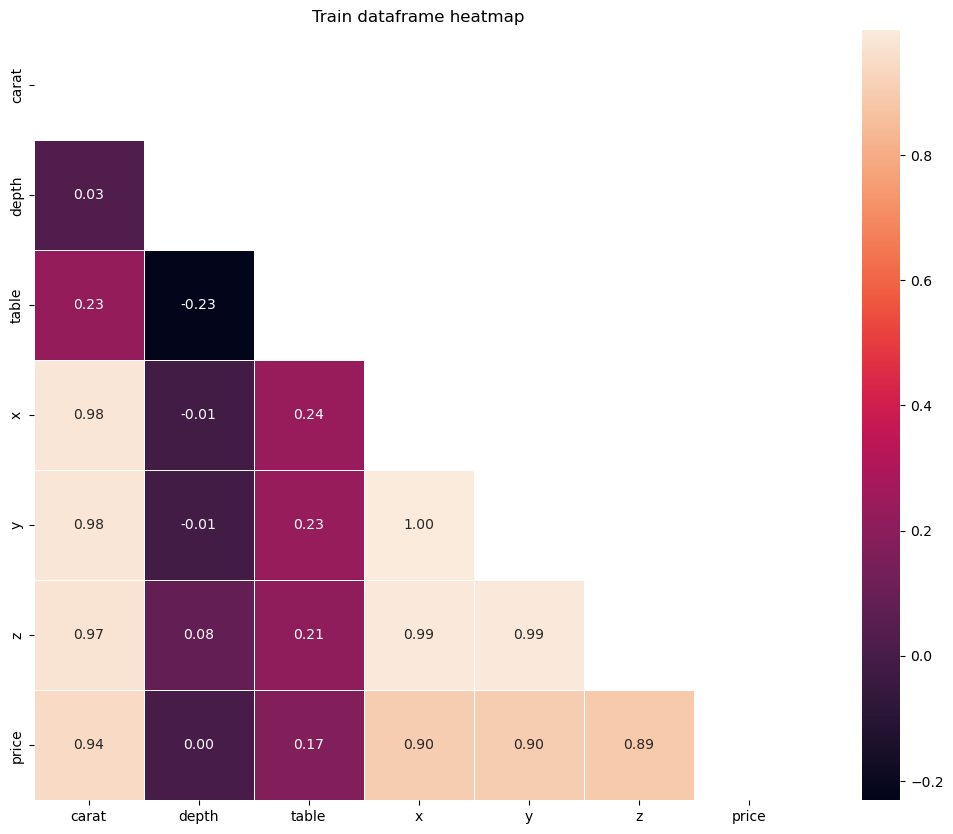

None

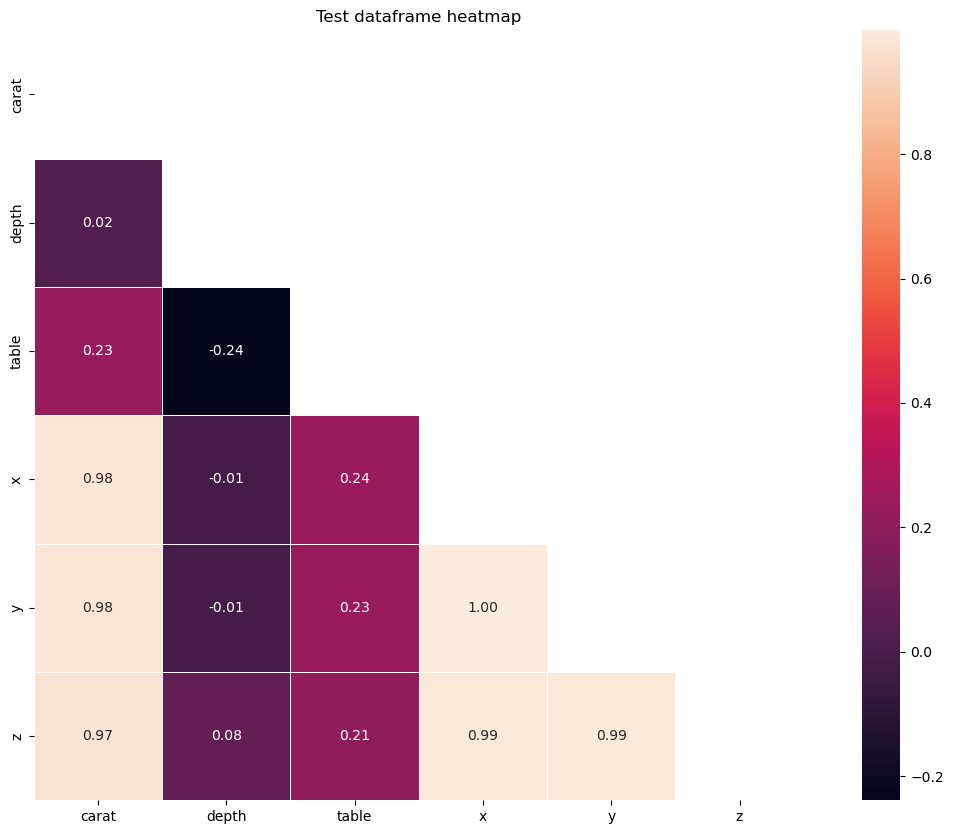

None

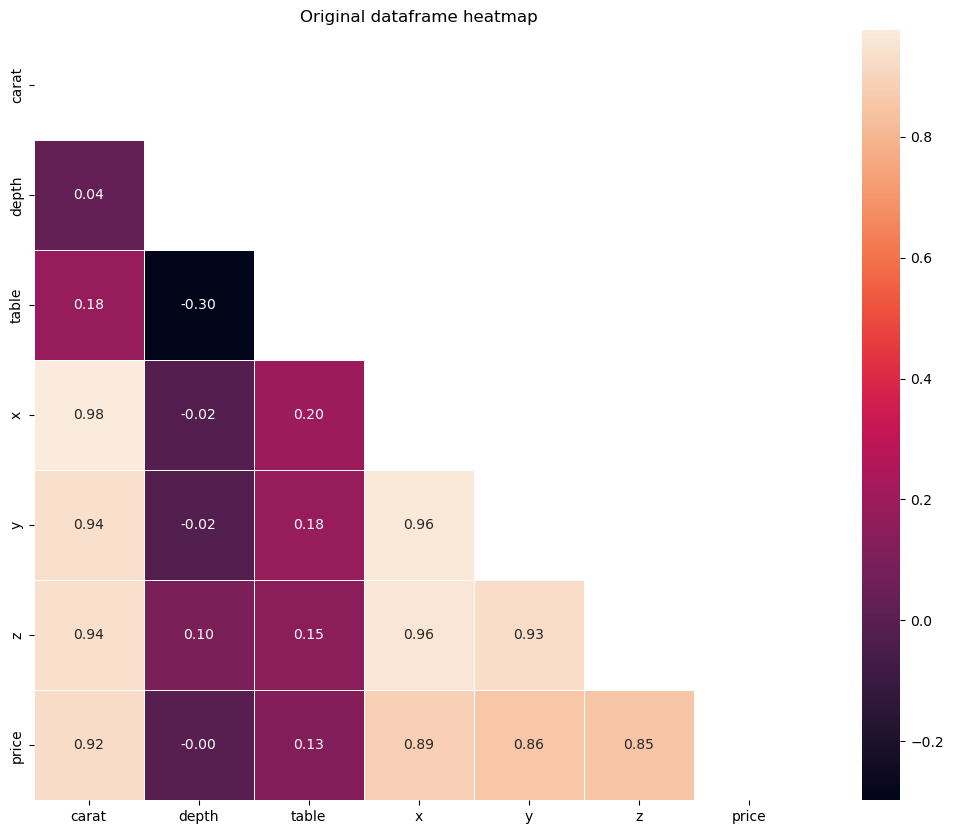

None

In [15]:
display(show_corr_heatmap(train_df, "Train dataframe heatmap"))
display(show_corr_heatmap(test_df, "Test dataframe heatmap"))
display(show_corr_heatmap(original_df, "Original dataframe heatmap"))

In [16]:
labels = ["train", "test", "original"]

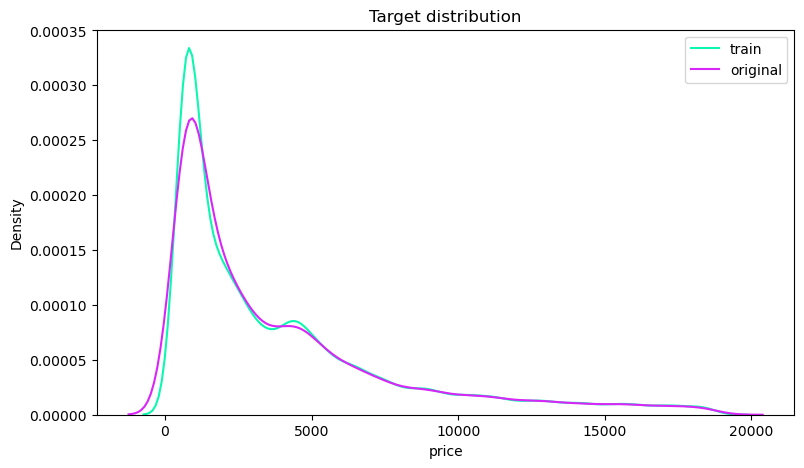

In [17]:
plt.figure(figsize=(9,5))
sns.kdeplot(data=train_df, x=TARGET, label=labels[0], color=PALETTE_3[1])
sns.kdeplot(data=original_df, x=TARGET, label=labels[2], color=PALETTE_3[2])
plt.title("Target distribution")
plt.legend()

In [18]:
comb_df = pd.concat([
    train_df.assign(set=labels[0]),
    test_df.assign(set=labels[1]),
    original_df.assign(set=labels[2]),
])
comb_df.reset_index(inplace=True)

In [19]:
comb_df

,index,carat,cut,color,clarity,depth,table,x,y,z,price,set
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0,train
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0,train
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0,train
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0,train
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
349585,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408.0,original
349586,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114.0,original
349587,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656.0,original
349588,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682.0,original


In [20]:
# test_df.drop(ID, axis=1, inplace=True)
# train_df.drop(ID, axis=1, inplace=True)
all_columns = test_df.columns
num_columns = np.setdiff1d(all_columns, CATEGORICAL_COLS)

num_columns

array(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype=object)

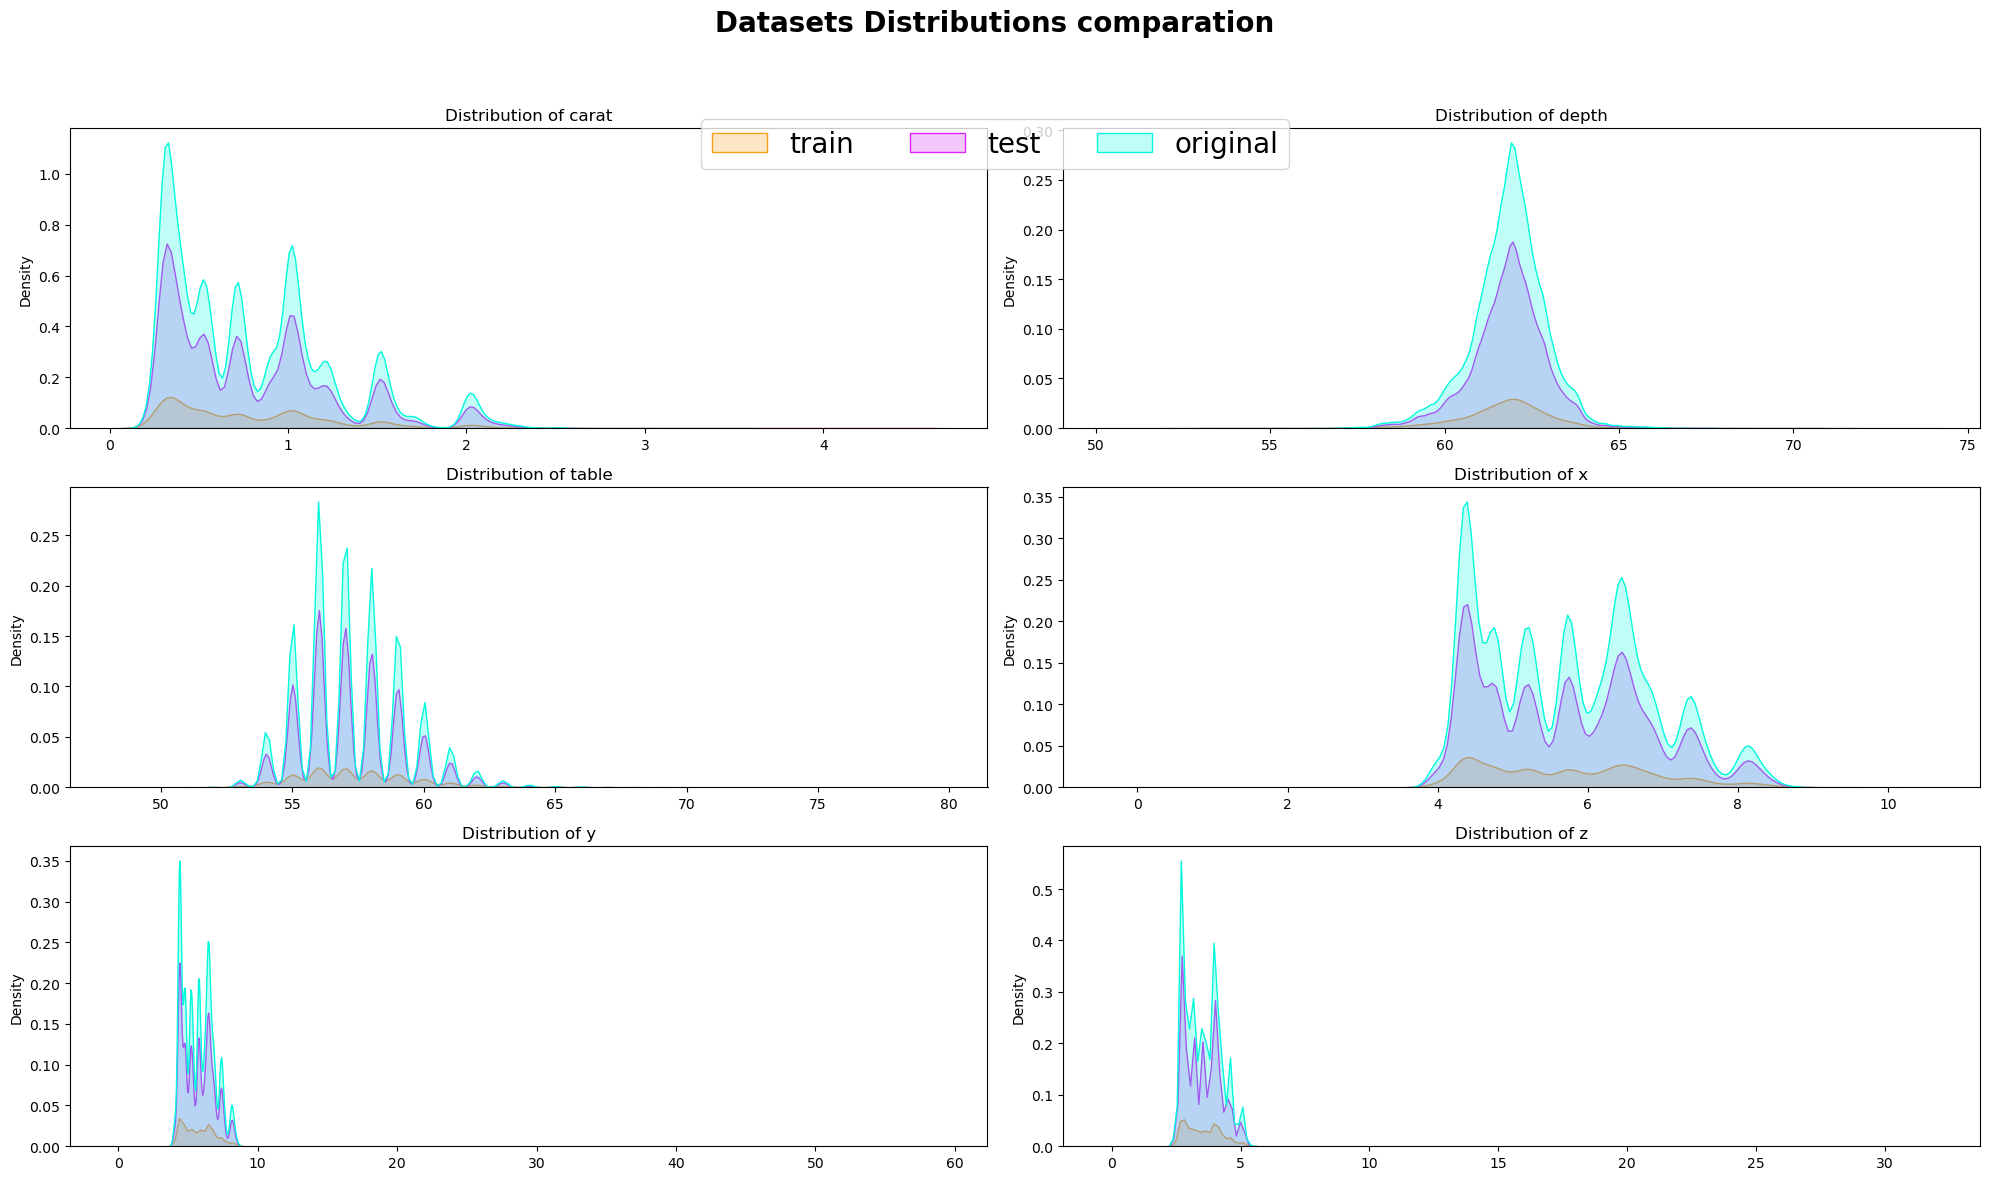

In [21]:
n_cols = 2
n_rows = math.ceil(len(num_columns)/n_cols)
#kde_palette = {labels[0]: PALETTE_5[2], labels[1]: PALETTE_5[4]}
kde_palette = {labels[0]: PALETTE_6[4], labels[1]: PALETTE_6[5], labels[2]: PALETTE_6[2]}

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()

for i, column in enumerate(num_columns):
    plot_axes = [ax[i]]
    sns.kdeplot(
        data=comb_df,x = column, hue = "set", label="Test PS datafraem",
        ax=ax[i], palette=kde_palette, fill=True
    )
#     sns.kdeplot(
#         data=comb_df, x=column, hue="set", label="Train PS dataframe",
#         ax=ax[i], color=PALETTE_4[3], fill=True
#     )
    
    # titles
    ax[i].set_title(f"Distribution of {column}");
    ax[i].set_xlabel(None)
    
    plot_axes = [ax[i]]
    handles = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        plot_ax.legend().remove()
    
for i in range(i+1, len(ax)):
    ax[i].axis("off")
    
fig.suptitle(f"Datasets Distributions comparation\n\n", fontsize=20, ha="center", fontweight="bold")
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 0.9), fontsize=20, ncol=4)
plt.tight_layout()

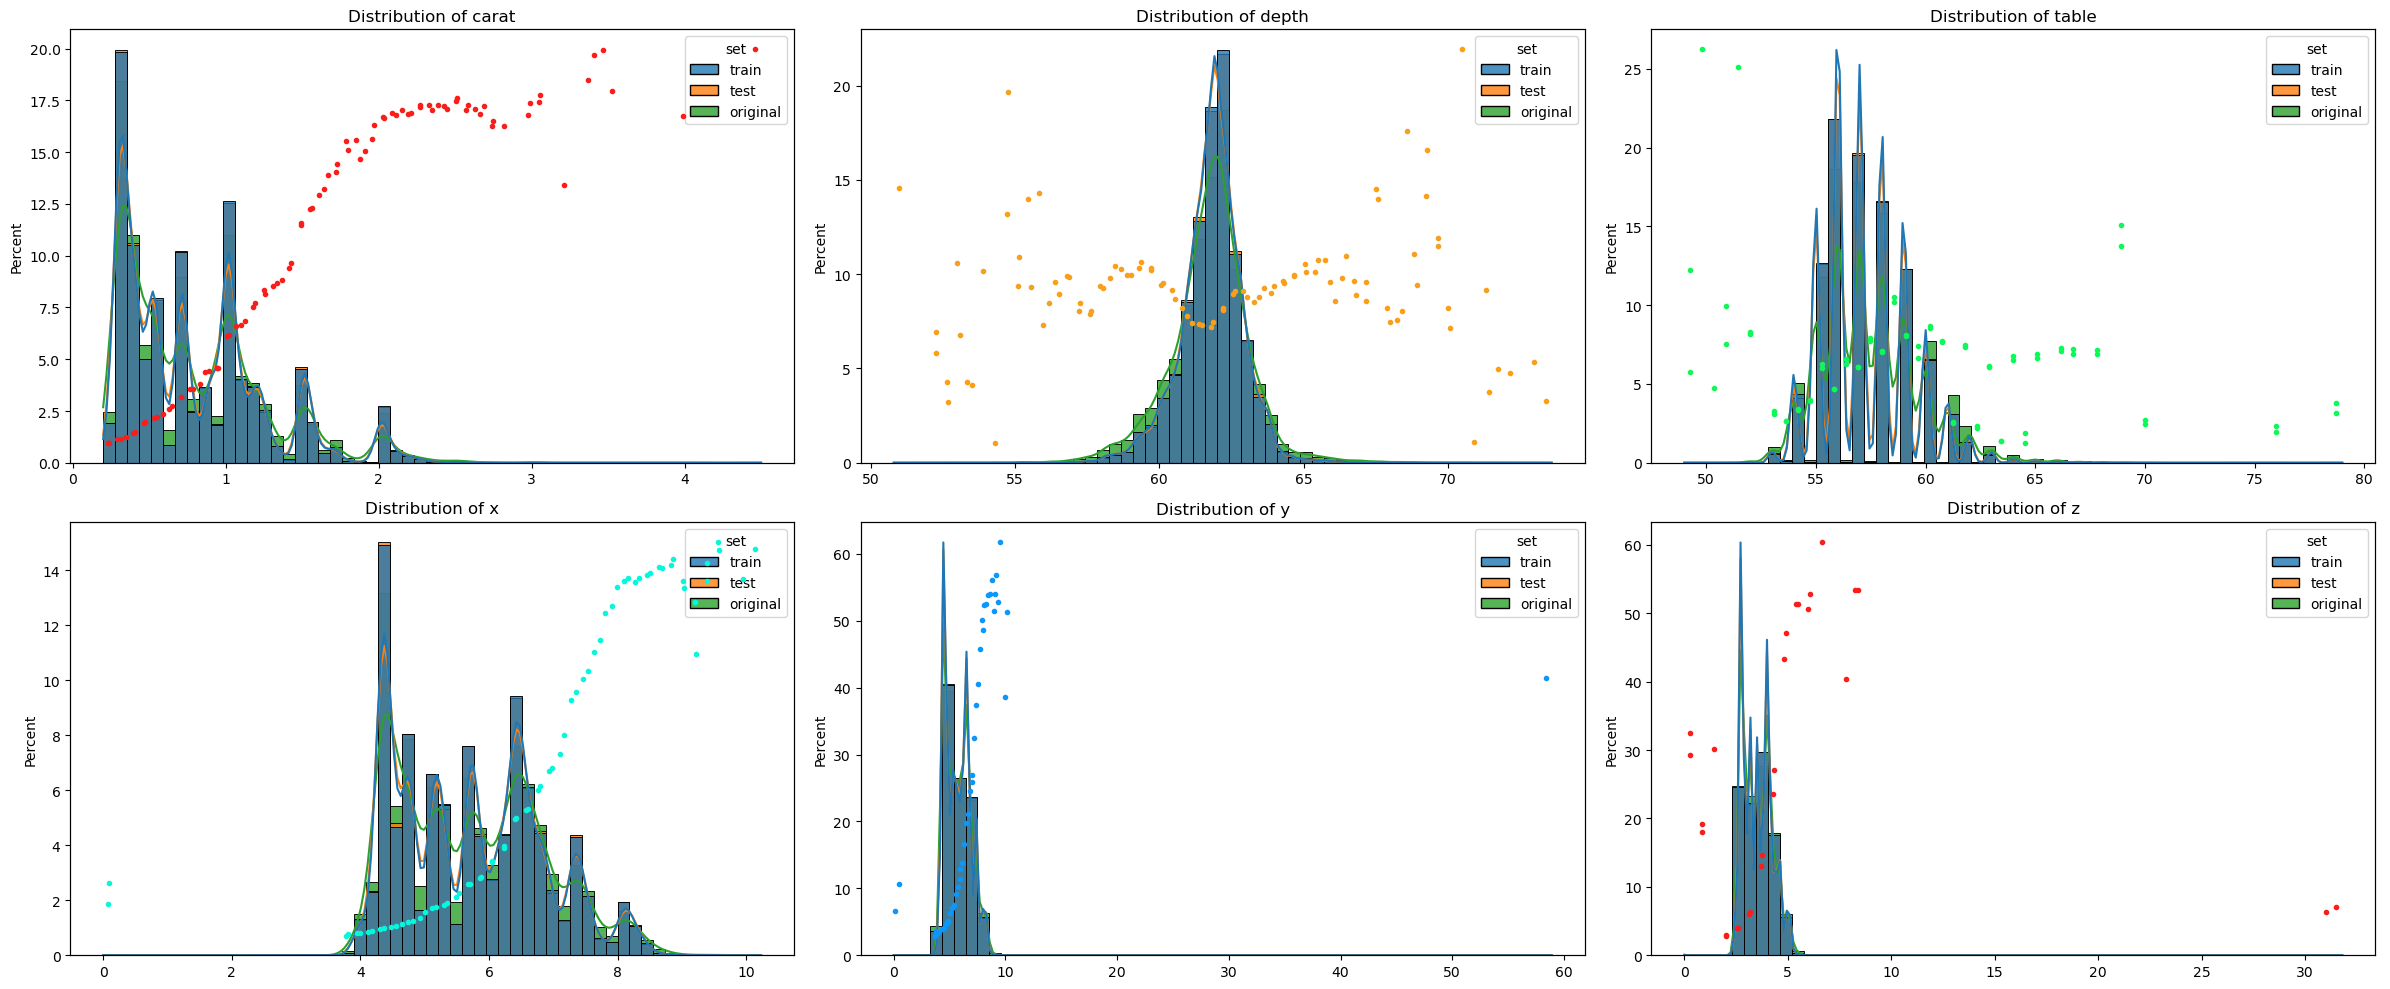

In [22]:
x = 0
n_bins = 55
histplot_hyperparams = {
    "kde":True,
    "alpha":0.8,
    "bins":n_bins,
    "stat":"percent",
}
line_style='-'

columns =  ORDINAL_COLS + NUM_COLS
n_cols = 3
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(24, n_rows*5))
ax = ax.flatten()

for i, column in enumerate(columns):
    if x == 4:
        x = 0
    else:
        x = x + 1
    plot_axes = [ax[i]]
    
    if column in ORDINAL_COLS:
        plot_ordinals(column, ax[i], PALETTE_6[x])
    else:
        plot_cont(column, ax[i], PALETTE_6[x])

    # titles
    ax[i].set_title(f"Distribution of {column}");
    ax[i].set_xlabel(None)
    
for i in range(i+1, len(ax)):
    ax[i].axis("off")

plt.tight_layout()

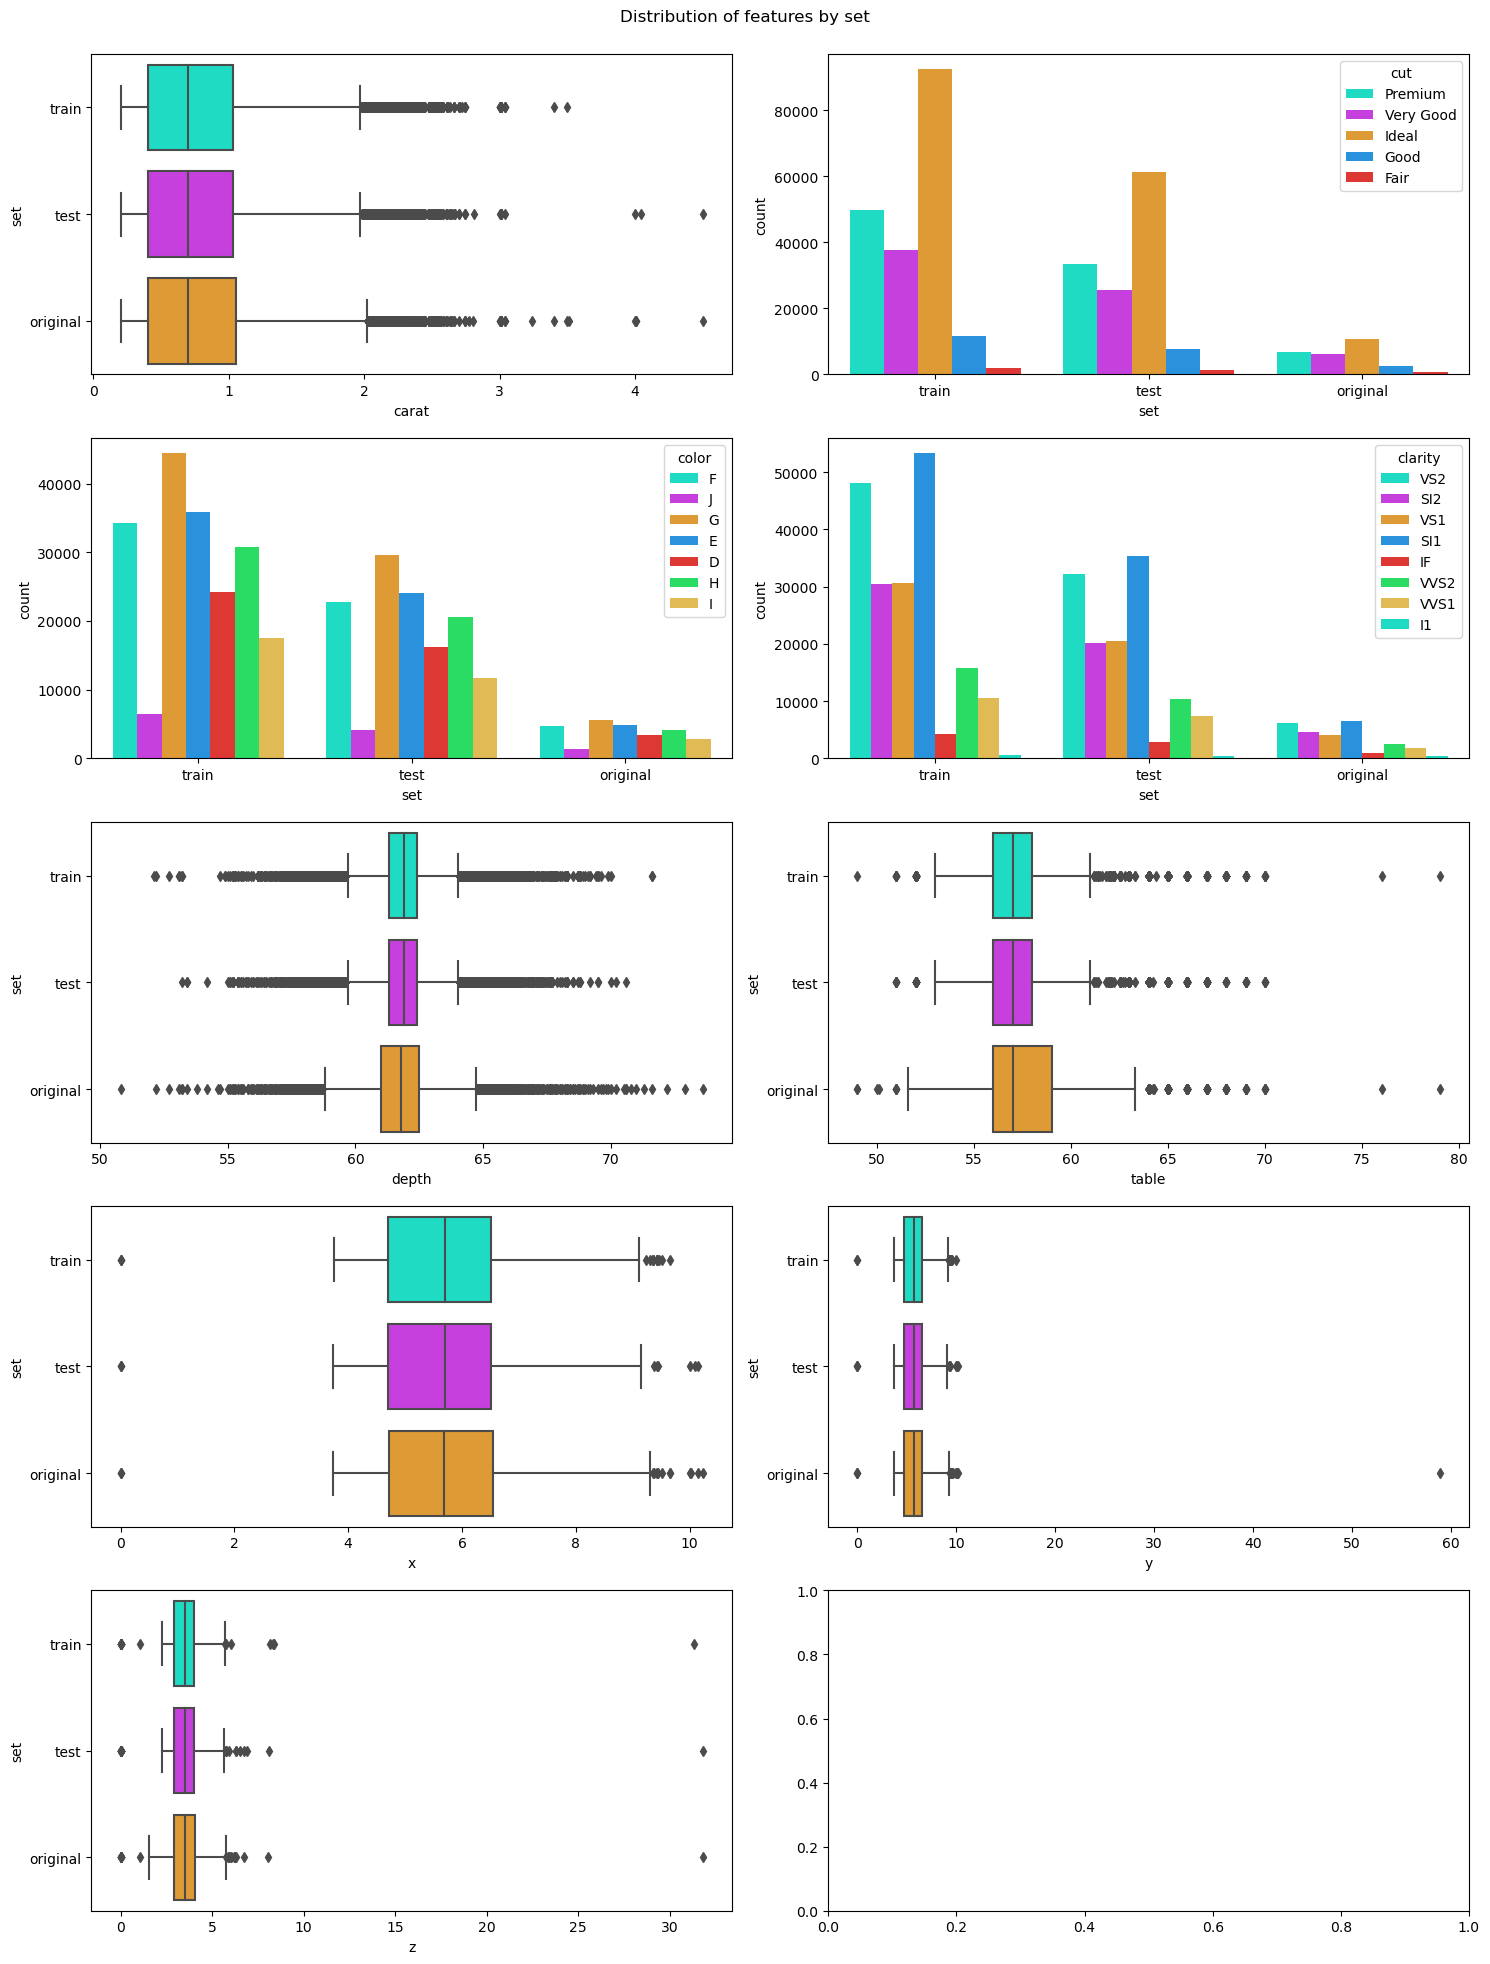

In [23]:
NUM_COLS.append("clarity_scaled")
n_cols = 2
n_rows = np.ceil(len(test_df.columns)/n_cols).astype(int)
fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15,n_rows*4))
for feat, ax in zip(test_df.columns, axs.flatten()):
    if feat in NUM_COLS:
        sns.boxplot(data=comb_df, x=feat, ax=ax, y="set", palette=PALETTE_7)
    else:
        sns.countplot(data=comb_df, x="set", ax=ax, hue=feat, palette=PALETTE_7)

fig.suptitle('Distribution of features by set')
plt.tight_layout(rect=[0, 0, 1, 0.98])
for df in [train_df, test_df, original_df]:
    df.drop(columns=["set"], errors="ignore")

Text(0.5, 1.0, 'price / depth')

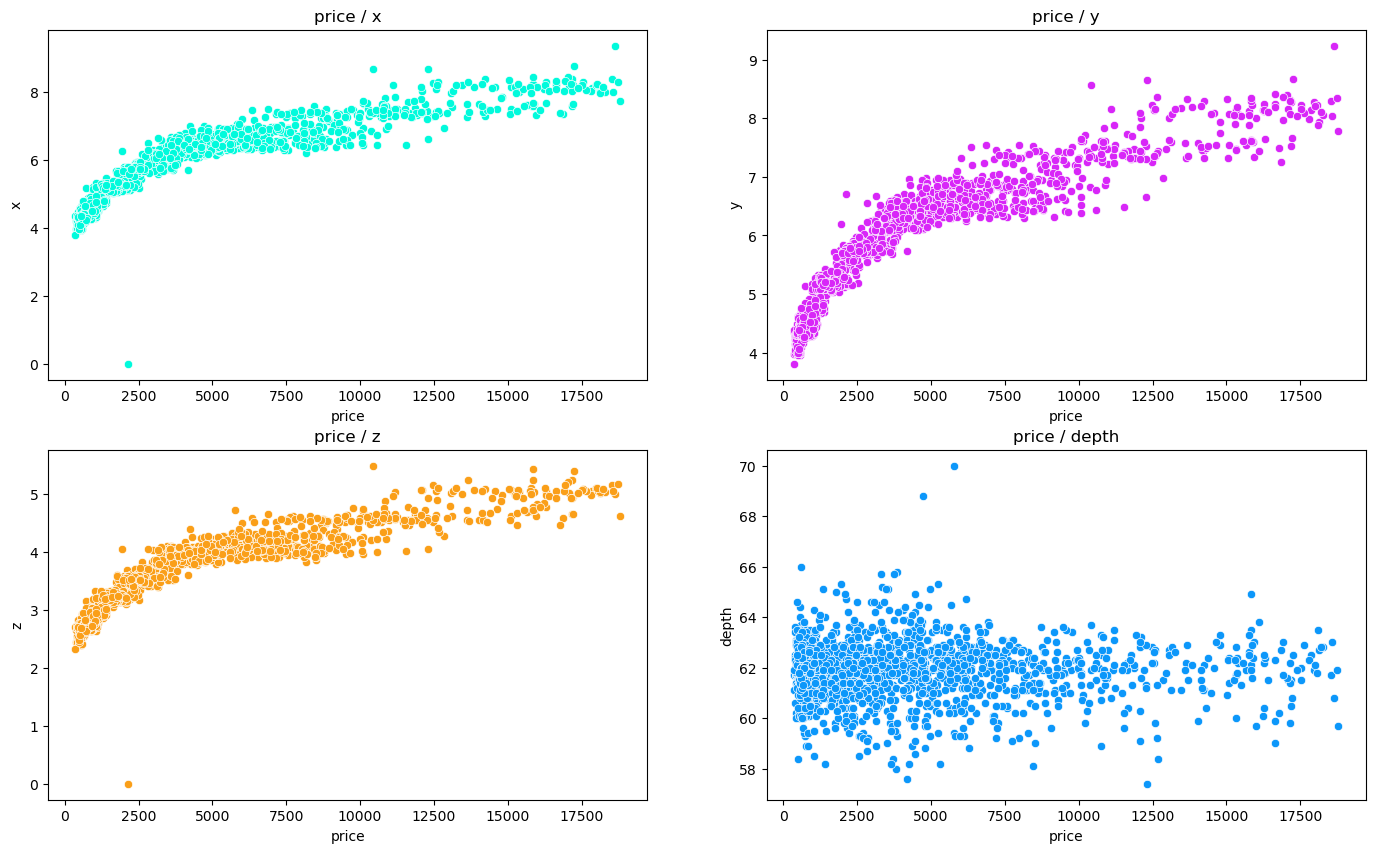

In [24]:
filtred_df = train_df.iloc[::100]

fig, ax = plt.subplots(2, 2, figsize=(17, 10))

sns.scatterplot(ax=ax[0,0], data=filtred_df, x=TARGET,y=POSITION_X, color=PALETTE_7[0])
ax[0, 0].set_title(f"{TARGET} / {POSITION_X}")
sns.scatterplot(ax=ax[0,1], data=filtred_df, x=TARGET,y=POSITION_Y, color=PALETTE_7[1])
ax[0, 1].set_title(f"{TARGET} / {POSITION_Y}")
sns.scatterplot(ax=ax[1,0], data=filtred_df, x=TARGET,y=POSITION_Z, color=PALETTE_7[2])
ax[1, 0].set_title(f"{TARGET} / {POSITION_Z}")
sns.scatterplot(ax=ax[1,1], data=filtred_df, x=TARGET,y=DEPTH, color=PALETTE_7[3])
ax[1, 1].set_title(f"{TARGET} / {DEPTH}")

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Data preparation and prediction</p>

### <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#A766FA; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #5F06D1">XGBoost Model</p>

In [25]:
def clarity_scale(df):
    df[CLARITY_SCALED] = df[CLARITY].apply(
        lambda x: 0 if x == "IF" else 1 if x == "VVS1" else 2 if x == "VVS2" else 3 if x == "VS1" else 4 if x == "VS2" else 5 if x == "SI1" else 6 if x == "SI2" else 7
    )
    df[CLARITY_SCALED] = df[CLARITY_SCALED].astype(np.int8)
    return df

train_df = clarity_scale(train_df)
test_df = clarity_scale(test_df)

train_df.drop(columns = [CLARITY], axis = 1, inplace=True)
test_df.drop(columns = [CLARITY], axis = 1, inplace=True)

train_dummies = pd.get_dummies(train_df[[CUT, COLOR]])
X = train_df.drop(columns = [CUT, COLOR, TARGET], axis = 1)
X = pd.concat([X, train_dummies], axis = 1)
Y = train_df[TARGET]

test_dummies = pd.get_dummies(test_df[[CUT, COLOR]])
test_baseline = pd.concat([test_df.drop(columns = [CUT, COLOR], axis = 1), test_dummies], axis = 1)

XGB_cv_scores, XGB_imp = list(), list()
preds = list()
execution = 5
for i in range(execution):
    kfold = KFold(n_splits = 5, random_state = 42, shuffle = True)
    
    for train_ix, test_ix in kfold.split(X, Y):
        # Data split
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
                
        # Model
        model = XGBRegressor(tree_method = 'gpu_hist',
                                min_child_weight = 10, 
                                n_estimators = 1000,
                                colsample_bytree = 0.7, 
                                gamma = 0.8, 
                                max_depth = 7, 
                                learning_rate = 0.02, 
                                subsample = 0.75).fit(X_train, Y_train)
        XGB_imp.append(model.feature_importances_)
        
        ## Predicting on X_test and test
        XGB_pred_1 = model.predict(X_test)
        XGB_pred_2 = model.predict(test_baseline)
        
        ## Computing roc-auc score
        XGB_cv_scores.append(mean_squared_error(Y_test, XGB_pred_1, squared = False))
        preds.append(XGB_pred_2)

XGB_cv_score = np.mean(XGB_cv_scores)    
print(f"Average RMSE {execution} time runned: {XGB_cv_score}")

Average RMSE 5 time runned: 576.8829827977937


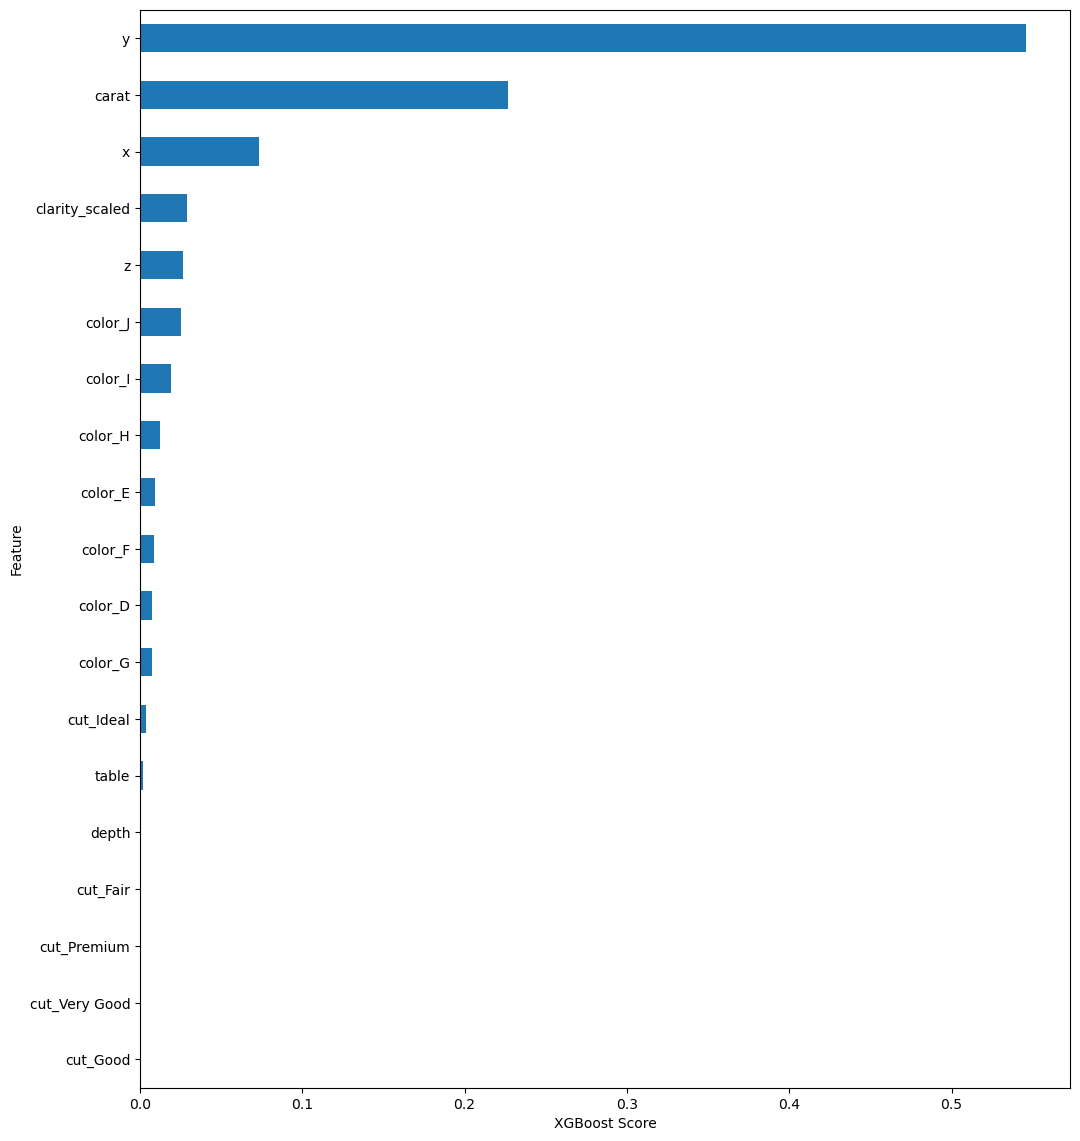

In [26]:
plt.figure(figsize = (12, 14))
pd.DataFrame(XGB_imp, columns = X.columns).apply(np.mean, axis = 0).sort_values().plot(kind = 'barh');
plt.xlabel('XGBoost Score')
plt.ylabel('Feature')
plt.show();               

In [27]:
xgb_preds_test = pd.DataFrame(preds).apply(np.mean, axis = 0)
submission_df[TARGET] = xgb_preds_test
submission_df.head()
submission_df.to_csv("submission.csv", index=False)

### <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#A766FA; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #5F06D1">Model</p>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Send prediction</p>

In [28]:
submission_df.to_csv("submission.csv", index=False)

### The model and data analysis is in process, it will be updated in the next days, if you liked it or if it helped you feel free to leave your upvote.